## Activitat 2: Quin és l’isòtop d’oxigen més pesat?

En aquesta activitat investigareu isòtops d'oxigen exòtics. Alguns són tan exòtics, que encara no els hem observat experimentalment! Utilitzareu la fórmula del ***MGL*** per predir quin és l’isòtop d’oxigen més pesat amb una energia d'enllaç positiva. Us demanarem que feu servir els valors que heu trobat pels paràmetres $a_V$ i $a_A$ a l'activitat anterior.

***Gràfica 3***: mostra l'energia d'enllaç per nucleó $(E/A)$, mesurada experimentalment i calculada teòricament. És una figura semblant a la ***Gràfica 2*** mostrada anteriorment, però ampliada per poder veure els nombres de masses de $A=12$ fins a $A=200$. El MGL es pot fer servir per predir l'energia d'enllaç per nucleó d’isòtops d’oxigen amb masses molt més grans que les observades experimentalment. Al 2022, hem observat isòtops d'oxigen amb masses enre $A=11$ i $A=28$. 

Aquesta activitat també es pot adaptar per a altres elements de la Taula Periòdica. Per fer-ho només heu d'entrar el símbol de l'element que vulgueu estudiar a la capsa anomenada ***Element***. Us animeu a canviar l'element i fer-te noves preguntes més enllà d'aquesta activitat?

Les dades utilitzades per crear la ***Gràfica 3*** es mostren al codi. Per inspeccionar el codi feu us del botó ***Click there to togle on/off the raw code*** que trobareu al final de la pàgina. 

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

%matplotlib nbagg

<IPython.core.display.Javascript object>


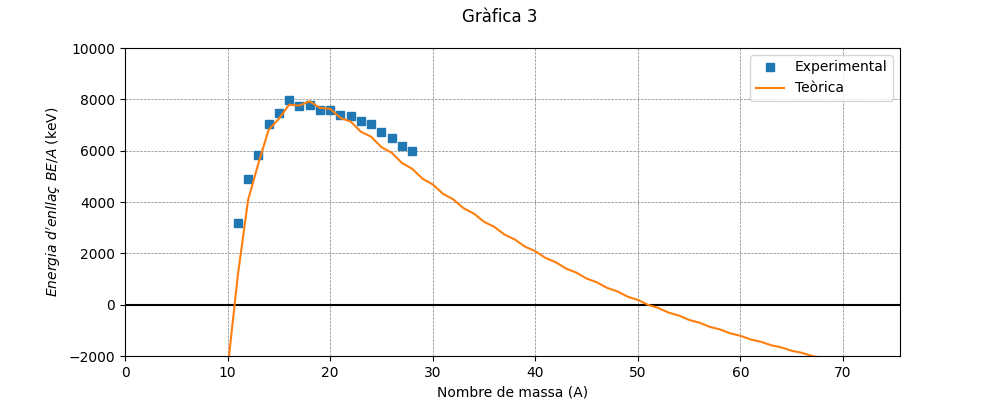

interactive(children=(Text(value='O', description='Element:', placeholder="Nom de l'element"), BoundedFloatTex…

In [7]:
def extract(x):
    global extract_n
    extract_n = df.loc[df['Element'] == x]
    return



def heaviest_isotop(df, y, element):
    out = widgets.Output()
    if not df.empty:
        string = 'La predicció per l\'isòtop de {} més pesat és un nucli amb A = '.format(element)
        array = y[len(y)//2:]
        absolut_array = np.abs(array-0)
        closest_value = absolut_array.argmin()
        closest_element = array[closest_value]
        with out:
            display('{}{} Nucleons'.format(string, A[closest_value+len(y)//2 ]))
    grid[0,0] = out
    return

fig, ax = plt.subplots(nrows=1, figsize=(10,4))
plt.suptitle('Gràfica 3')
style = {'description_width': '200px'}
layout = widgets.Layout(width='300px') 

def update_plot(element, av, aS, ac, aA, ap, checkbox):
    global A, y, df
    '''
    this function is linked to the slider and
    it replots the binding energy by nucleon when the slider are changed
    '''
    df = pd.read_fwf('https://raw.githubusercontent.com/arnaurios/Divulgacio_Outreach/main/mass_1.mas20.txt',    
                 usecols=(2, 3, 4, 6, 11),
                 names=['N', 'Z', 'A', 'Element', 'Experimental'],
                 widths=(1,3,5,5,5,1,3,4,1,14,12,13,1,10,1,2,13,11,1,3,1,13,12,1),
                 header=28, 
                 index_col=False)
    df['Experimental'] = pd.to_numeric(df.Experimental.str.replace('#',''))
    extract(element)
    df = extract_n
    df.reset_index(drop=True, inplace=True) 
    if not df.empty:
        Z = df.at[0, 'Z']
    else:
        Z=0
    A = np.linspace(1, 9 * Z, 9 * Z, dtype=int)
    ax.clear()
    plt.axhline(0, color='black')
    y = (av*A-aS*pow(A,2/3)-ac*pow(Z,2)*pow(A,-1/3)-aA*pow(A-2*Z,2)/A + ((A % 2)==0) * ap/np.sqrt(A))*1000/A
    extract_n.plot(x='A',y='Experimental', marker='s', linestyle = 'None', ax=ax)
    ax.plot(A, y, label='Teòrica')
    ax.legend(loc=1)
    ax.set_xlabel('Nombre de massa (A)')
    ax.set_ylabel('$Energia \ d\'enllaç \ BE/A$ (keV)')
    ax.set_xlim(0, )
    ax.set_ylim(-2000, 10000)
    ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.show()
    heaviest_isotop(df, y, element)
    return


element = widgets.Text(
          value='O',
          placeholder='Nom de l\'element',
          description='Element:',
          disabled=False
          )

av = widgets.BoundedFloatText(value=16, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='$a_V$, Volum:', 
                              disabled=False,
                              style=style,
                              layout=layout)

aS = widgets.BoundedFloatText(value=18.3, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='$a_S$, Superfície:', 
                              disabled=True,
                              style=style,
                              layout=layout)

ac = widgets.BoundedFloatText(value=0.714, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='$a_C$, Coulomb:', 
                              disabled=True,
                              style=style,
                              layout=layout)

aA = widgets.BoundedFloatText(value=23, 
                              min=0, 
                              max=50, 
                              step=0.1, 
                              description='$a_A$, Asimetria:', 
                              disabled=False,
                              style=style,
                              layout=layout)

ap = widgets.BoundedFloatText(value=12, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='$a_P$, Aparellament:', 
                              disabled=True,
                              style=style,
                              layout=layout)

checkbox = widgets.Checkbox(
                            value=False,
                            description='Bloqueja / Desbloqueja Parametres',
                            disabled=False,
                            indent=False
                            )

link1 = widgets.link((aS, 'disabled'), (checkbox, 'value'))
link2 = widgets.link((ac, 'disabled'), (checkbox, 'value'))
link3 = widgets.link((ap, 'disabled'), (checkbox, 'value'))

grid = widgets.GridspecLayout(1,1, height='auto')
widgets.interactive(update_plot, element=element, av=av, aS=aS, ac=ac, aA=aA, ap=ap, checkbox=checkbox)

En aquesta segona part del repte, fem servir els paràmetres del model de l’***Activitat 1*** per predir les propietats dels isòtops d’oxigen encara no descoberts.

* Les tasques es mostren a continuació en *cursiva*.  
* Les respostes a les preguntes amb una (<font color='red'>Q</font>) al costat es demanen al qüestionari de l'activitat (el pots trobar a https://forms.office.com/r/rDDD2RRTik).

#### Activitat 2a

(<font color='red'>Q</font>) Quin és l’isòtop d’oxigen més pesat amb una energia d'enllaç positiva?

*Introduïu els valors dels termes de volum i asimetria. El programa calcularà immediatament l’isòtop d’oxigen més pesat i us en  proporcionarà el valor.*

In [3]:
grid

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')),), layout=Layout(grid_template_areas='"w…

El valor proporcionat aquí és aquell en que l'energia d'enllaç del MGL de la ***Gràfica 3*** intersecta amb l'eix de les abcisas. Per tal que un nucli pugui existir i no decaigui espontàniament en les partícules que el conformen, ha de tenir una energia d'enllaç $E/A$ positiva!

#### Activitat 2b

Avaluació de la incertesa en el terme d’asimetria.

*Si suposem que, per a la constant de terme d’asimetria $a_A$, tots els valors de l'interval entre $20$ i $25$ MeV són possibles (mantenint el terme de volum $a_V$ amb el valor que heu trobat anteriorment), busqueu el rang de prediccions per a l’isòtop d’oxigen més pesat amb una energia d’enllaç positiva. Introduïu les vostres respostes als requadres següents i discutiu el significat d'aquest rang.*

In [4]:
box_1 = widgets.Text(
                     value='',
                     description='El rang (en nucleons) de l\'isotop més pesat va de:',
                     disabled=False,
                     style={'description_width': '300px'},
                     layout=widgets.Layout(width='350px') 
                     )
box_2 = widgets.Text(
                     value='',
                     description='fins a',
                     disabled=False,
                     style={'description_width': '50px'},
                     layout=widgets.Layout(width='100px') 
                     )
display(av,aA,widgets.HBox([box_1, box_2]))

BoundedFloatText(value=16.0, description='$a_S$, Volum:', layout=Layout(width='300px'), max=20.0, step=0.1, st…

BoundedFloatText(value=23.0, description='$a_A$, Asimetria:', layout=Layout(width='300px'), max=50.0, step=0.1…

#### Activitat 2c

Avaluació de la incertesa en el terme del volum.

*Si suposem que, per a la constant terme de volum $a_V$, tos els valors de l'interval entre $15$ i $17$ MeV són possibles (mantenint el terme d'asimetria amb el valor que heu trobat anteriorment), busqueu el rang de prediccions per a l’isòtop d’oxigen més pesat amb una energia d'enllaç positiva. Introduïu les vostres respostes als requadres següents i discutiu el significat d'aquest rang.*

In [5]:
box_1 = widgets.Text(
                     value='',
                     description='El rang (en nucleons) de l\'isotop més pesat va de:',
                     disabled=False,
                     style={'description_width': '300px'},
                     layout=widgets.Layout(width='350px') 
                     )
box_2 = widgets.Text(
                     value='',
                     description='fins a',
                     disabled=False,
                     style={'description_width': '50px'},
                     layout=widgets.Layout(width='100px') 
                     )
display(av,aA,widgets.HBox([box_1, box_2]))

BoundedFloatText(value=16.0, description='$a_S$, Volum:', layout=Layout(width='300px'), max=20.0, step=0.1, st…

BoundedFloatText(value=23.0, description='$a_A$, Asimetria:', layout=Layout(width='300px'), max=50.0, step=0.1…

##### Bravo per haver completar aquesta activitat! Ara aneu a la següent activitat [Activitat 3, Massa Mínima d'una Estrella de Neutrons](./MGL3_Estrella_Neutrons_Massa_Minima.ipynb).

In [6]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')